Please fill in your name and that of your teammate.

You: Albin Aliu

Teammate: Christoph Jutzet

# Introduction

Welcome to the seventh lab. After learning about SVMs last week, we finally introduce the _kernel trick_ and make them capable of tackling nonlinear data. We also introduced more generally the concept of _function mapping_ and learned a bit about word embeddings.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 16 points (out of 24 available) to pass** (66%).

# 1. Function Mappings

#### 1.1 **[3pt]** Give an example for each of the following concepts (original, i.e. not found in the slides):

1. Mapping from an example data type to a decision space
2. Inverse mapping
3. Mapping from the example data to two destination feature spaces
4. Mapping from the two feature spaces above to a decision space

For example (here following the slides):

1. Given a picture, decide if it represents an apple or an orange. Original space: 
$64\times64\times3$ images; destination space: $\{$apple, orange$\}$.
2. Given the label apple, map it to a $64\times64\times3$ picture of the fruit.
3. Map $\Phi_1$ goes from the picture to an estimate of average color; map $\Phi_2$ goes from the picture to a fruit width measured in pixels.
4. Map $\Phi_3$ goes from the two features of estimated color and fruit width, to the decision space of classifying the fruit as apple or orange.

1. For a given image of size 64 x 64, identify the integer displayed in the image.
2. For a given song, identify the genre of the song.
3. For a given set of personality characterstics, identify a fitting pet for the owner.
4. For a given set of data about flowers (petal length, width, etc) identify which flower it is.
 

#### 1.2 **[1pt]** Explain advantages and disadvantages of Bag Of Words versus Word Embedding.

BoW usually produce a higher dimensional feature map (size of directory). Most of the entries will be 0, since we only count the number of occurences in the text and not every text contains all words from a dictionary. In contrary, word embedding can be embedded in a feature space of the dimensions of your choice. 
Further, Word Embeddings considers the distance of words, i.e. words that appear often together (King and Queen or London and UK) will appear more close to each other, since they often appear together.



#### 1.3 **[2pt]** Refer to the graph exemplifying Word Embedding in the slides, and its explanation. (i) What does it mean that the point representing Paris is close to the point representing Berlin? (ii) Why is the point for Paris closer to the point for France than to the point representing Italy?

(i) The words Berlin and Paris are similiar concepts (capitals of cities).

(ii) Paris is the capital of France. They tend to appear more often together than Paris and Italy. 


# 2. Kernels theory

#### 2.1 **[1pt]** Write the definition of kernel function (use latex).

Let X be the original space, let $\mathcal{H}$ be  a Hilbert space with inner product denoted as $\langle \cdot \ , \cdot \rangle$    and let $\Phi$: X $\rightarrow \mathcal{H}$ be a mapping from the original space to the Hilbert space. The kernel function k is defined as follows:   
k: X $\times$ X $\rightarrow \mathbb{R}$ where ( x , y ) $\mapsto \langle \ \Phi(x) \ , \ \Phi(y) \  \rangle$  

Albin:

$$
k(x, y)=\langle\phi(x), \phi(y)\rangle
$$

#### 2.2 **[1pt]** Write the definition of reproducing property (use latex).

Note it is explained in English in the slides.

Let $k: X \times X \rightarrow \mathbb{R}$  be a function and let $\mathcal{H}$ be a Hilbert space with inner product denoted as $\langle \cdot \ , \cdot \rangle$, then $k$ is a kernel of the Hilbertspace  $\mathcal{H}$ $\Leftrightarrow \forall$ x $\in$ X and $\forall$ $f \in \mathcal{H}$, f function in the Hilbert space,  we have that $\langle \ f \ , \ \Phi(x) \  \rangle = f(x)$, where $\Phi(x) :X \rightarrow \mathbb{R}$ with $y \mapsto \Phi(x)(y) = k( y , x )$  


$$
f(x)=\langle f, \phi(x)\rangle, \quad \phi(x)=k(\cdot, x) \in \mathcal{H}
$$

#### 2.3 **[2pt]** Explain the kernel trick in English.

Since finding a Feature Map $\phi$ is not always possible or can get very complicated, we rather use the kernel trick to be more efficient. Given a kernel function then by reproducing property we have that $ \langle \ \Phi(x) \ , \ \Phi(y) \  \rangle$ is equivalent to   $ \langle \ k( \cdot , x ) \ , \ k( \cdot , y ) \  \rangle$, where $k$ is already known and thus we don't need find the embedding $\phi$ for the datapoints. i.e the mapping $\phi$ does not have to be computed explicitly.

#### 2.4 **[1pt]** Explain in English the required properties of a Mercer kernel.

- The kernel needs to be symmetric, i.e the output of the kernal does not depend on the choice of order, in which one passes two arguments to the function.
- If you consider the Kernelmatrix $K$ ( the matrix consisting of the output values of the kernel function as elements, where on the i-th row and k-th column, we have the output of the kernel function with arguments $x_i$ and $x_k$ applied in that order (and thus if we have n points in our dataset, we have that $K \in \mathbb{R}^{n	\times n}$) ), which is by the first propertey symmetric, then this matrix is going to be positive semi-definit, i.e for any $x \in \mathbb{R}^n$ we have that $x^TKx \geq 0$ and there exists at least one $x \neq 0$ s.t  $x^TKx = 0$  (the to the symetric matix K corresponding Bilinear form is positive semi-definit).

Albin:
- symmetric
- positive definiteness


#### 2.5 **[1pt]** Calculate by hand the linear kernel on points $\{[2,4], [-1, 2]\}$.

$[2,4] * [-1, 2]^\top = 2 * (-1) + 4 * 2 = 6  $

#### 2.6 **[1pt]** How do you compute the entry of the Gram matrix for row $i$ and column $j$ for a Gaussian kernel?

the coefficient of the i-th row and j-th column in the Gram matrix is $K_{ij} = k(\ x_i \ , \ x_j\ ) $ (see 2.4)

#### 2.7 **[2pt]** Explain why does the Perceptron work with non-linearly separable data using Kernelization. Do you think Linear Regression would work with Kernelization? Explain your reasoning.

Yes. By using Kernelization, we can map data to a higher dimensional space, where the data is separable. Then we can use Perceptron or any kind of linear algorithm, also linear regression.

#### 2.8 **[1pt]** Explain the Universal Consistency of SVMs (in English).

SVMs with Gaussian kernels can approximate any arbitrary function

# 3. Kernels in practice

For simplicity, let's use once again a two-species adaptation of the Iris dataset. You can copy the code from the last assignment. This time though, to make it harder for linear classifiers let's separate the "central" species from the other two. This means that you should set label `versicolor` rather than `setosa` as class `-1`. I suggest you un-comment the `pairplot`s to verify it works.  
NOTE: all recommendation on how to handle and prepare the data from the past assignment(s) still hold. As do the warnings that using the wrong data sets will **invalidate the whole answer**.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object


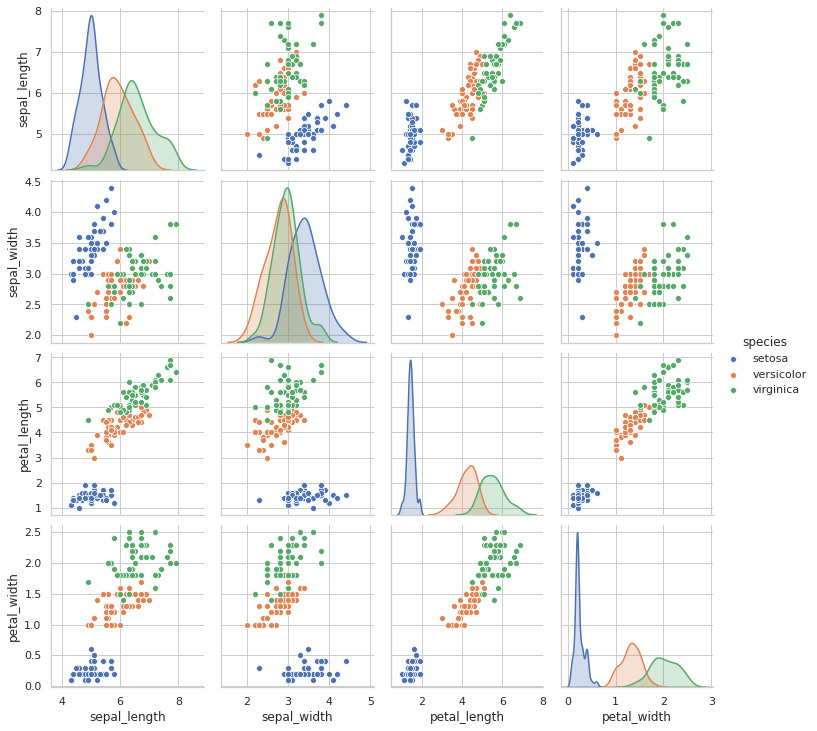

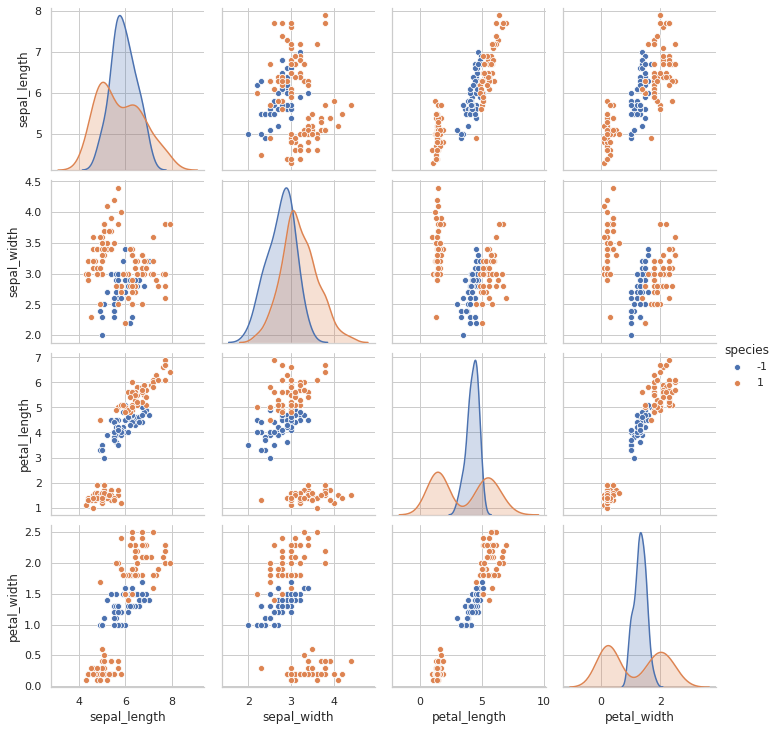

In [19]:
df = sns.load_dataset('iris')
sns.pairplot(df, hue='species')

df.loc[df['species'] == 'versicolor', 'species'] = -1
df.loc[df['species'] != -1, 'species'] = 1
df['species'] = pd.to_numeric(df['species'])
print(df.dtypes)
sns.pairplot(df, hue='species')

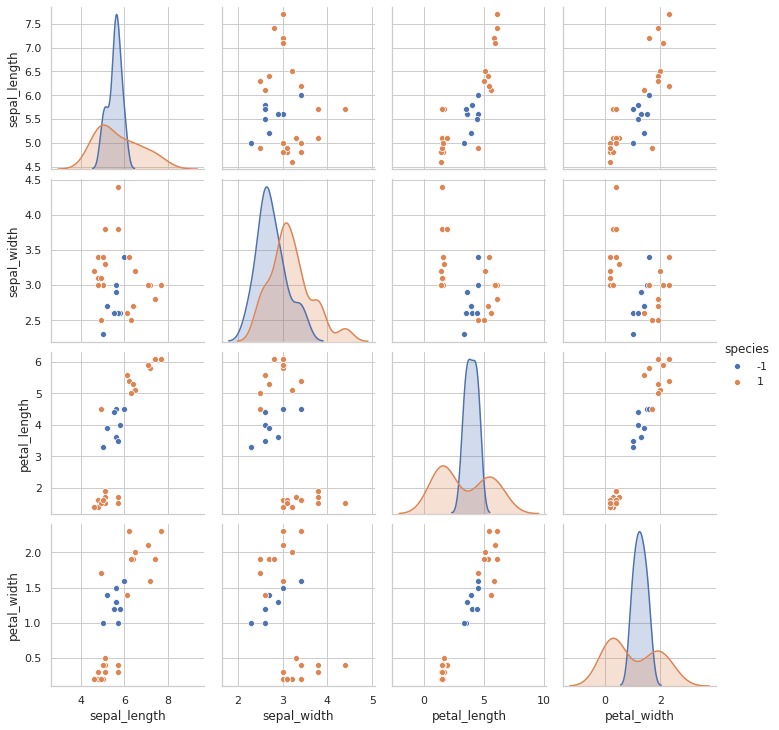

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
sns.pairplot(test, hue='species')

#### 3.1 **[1pt]** Train an SVM with linear kernel on the Iris data using Scikit-learn (this time, use class `SVC`). Then do the same using a Gaussian kernel and compare the performance, using the function `score()`.

- Remember to prepare inputs/labels for Scikit-learn; again the last assignment should help.
- The function `score()` on the trained model just does the prediction and returns the percentage of correct answers. It is a useful function to learn to quickly check if your model is working.
- You expect the linear kernel to perform poorly. If the performance is close to the Gaussian kernel, it is possible that the test set was by chance not homogeneous. You can verify that by doing a pairplot on the test set, and if so just run the data loading and preparation again.

In [21]:
from sklearn.svm import SVC

# prepare training set 
# x_train : {array-like, sparse matrix} of shape (n_samples, n_features)
x_train = train[['petal_length','petal_width']]
# y_train : array-like of shape (n_samples,)
y_train = train['species']
# test-set
x_test = test[['petal_length','petal_width']]
# Lables of the test-set
y_test = test['species']

# SVC with linear kernal
lin = SVC(kernel='linear', C=1.0).fit(x_train, y_train)
print(lin.score(x_test, y_test))

gau = SVC(kernel='rbf', C=1.0).fit(x_train, y_train)
print(gau.score(x_test, y_test))

0.6666666666666666
0.9666666666666667


#### 3.2 **[1pt]** Write a Python function that takes two data points and a value for `gamma` as input, and returns the Gaussian kernel of the points.

In [22]:
import math

# just for me to test whether the value is close to 1
x1 = np.array([1,2,3])
x2 = np.array([1,2,3.1])

# gaussian kernal: exp(− γ * ||x1 -x2||^2)
kernel = lambda x, y, gamma: math.exp( - gamma*np.linalg.norm( x - y )**2 )
kernel(x1 , x2, 1)

0.990049833749168

#### 3.3 **[3pt]** Write a Python function that takes two dataset (and a gamma) and returns their Gram matrix for a Gaussian kernel.

- You need two datasets because you need to compute the *train* matrix between the train and itself, but the *test* matrix between the test and the train.
- Simplest method:
    - Create a return matrix, initially empty, shaped size_of_A times size_of_B, with dtype 'float64'
    - Run two loops with indices (i, j) in ranges up to size_of_A and size_of_B
    - Compute the kernel between row i in A and row j in B, and place it in the return matrix at row i column j
- Careful with Pandas' `iterrows()`, as the "index" it returns is the DataFrame index (i.e. for use with `loc[]`), not the ordinal index (i.e. for `iloc[`). 
- Generating the matrix automatically is harder, as there is no straightforward way to compute an `outer` in numpy or pandas with a custom function.
- One way is to use `column_stack` https://stackoverflow.com/a/21759340 then apply the kernel defined above.
- Another is to use `ufunc.outer` http://folk.uio.no/inf3330/scripting/doc/python/NumPy/Numeric/numpy-7.html which is only defined for Universal Functions (`ufuncs`). Look at the examples for `outer`, you can re-implement the function above starting with `np.subtract.outer(A, B)`, which generates the matrix (but check the shape!), then you can run the other operations using broadcast. Both outers and universal functions are super useful, it's worth the effort of learning them, more [[here]](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).
- `pandas.apply()` along rows is also an option you should be able to consider with by now. The function name for `-` is `np.subtract` (which is an `ufunc`, see above).

Above all, remember the first rule of a good BDD engineer: red, green, refactor! First make it work, then make it better ;) complex solutions are as good as bonus questions here.

Also, know that a common default value for gamma is one over the number of features.

In [24]:
# I keep it simple
def gram(data1, data2, gamma):

  # prepare dimesnion of the matrix (in our case 120 x 120)
  size_of_A = data1.shape[0]
  size_of_B = data2.shape[0]

  # create 0-matrix of dimension (size_of_A * size_of_B) and set type to float64
  # the same way I had doen it for the covariance matrix in serie 3 ex 3.4
  gram = np.array([[0]*size_of_A]*size_of_B,  dtype = 'float64'  )
  # could also be done with 
  # gram = np.empty((size_of_A,size_of_B), dtype = 'float64')

  # loop
  for i in range(size_of_A):
    for j in range(size_of_B):
      # j-th row and i-th coloumn is replaced by k(xi,xj) = k(xj,xi)
      gram[j][i] = kernel( data1.iloc[i], data2.iloc[j], gamma)
  
  return gram



#### 3.4 **[2pt]** Compute the Gram matrix on the inputs of your datasets. Then train a new SVM, same settings as before with linear kernel, but this time using the Gram matrix('s rows) as the inputs. Print the `score` performance of this new SVM.

- With an 80-20 split you are looking at a $120 \times 120$ shape for the train, and $30 \times 120$ for the test

In [29]:
# well we don't want the labels to be involved in our data, when we train it.
train_nolable = train.iloc[:,:-1]
# same goes for our test set
test_nolable = test.iloc[:,:-1]

# calculate 120 x 120 matrix for the training set with gamma = one over the number of features.
train_gram = gram(train_nolable, train_nolable, 1/train_nolable.shape[1])
# labels fo the training set
train_labels = train['species']
# calculate 30 x 120 matrix for the test set with gamma = one over the number of features.
test_gram = gram(train_nolable, test_nolable, 1/train_nolable.shape[1])
# labels fo the test set
test_labels = test['species']

# SVC with linear kernal
clflin2 = SVC(kernel='linear', C=1.0)

# train the date on the training set and check the score for the test-set
clflin2.fit(train_gram, train_labels).score(test_gram, test_labels)


0.9666666666666667

#### 3.5 **[1pt]** Plot the confusion matrix for the three SVMs you trained in the past questions.

- Let's learn a convenient and easy function for this common, very useful metric: `plot_confusion_matrix` [[link here]](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html).
- So far we saw explicitly 4 cells: true and false positives, true and false negatives. More generally the confusion matrix can be scaled to any number of classes by having the correct labels on the rows, and the predictions on the columns. Errors will be outside the diagonal.
- You can use the `normalize` option to get percentages if you like. Which setting do you find most informative?
- It's easier if you write a `for` loop over the three models you trained in the previous questions -- just make sure you gave them different names. Also careful as one takes a Gram matrix as input ;)

Confusion matrix, without normalization
[[ 0  8]
 [ 2 20]]
Normalized confusion matrix
[[0.         1.        ]
 [0.09090909 0.90909091]]
Confusion matrix, without normalization
[[ 8  0]
 [ 1 21]]
Normalized confusion matrix
[[1.         0.        ]
 [0.04545455 0.95454545]]
Confusion matrix, without normalization
[[ 8  0]
 [ 1 21]]
Normalized confusion matrix
[[1.         0.        ]
 [0.04545455 0.95454545]]


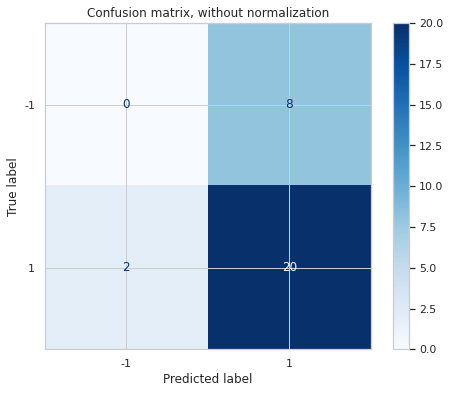

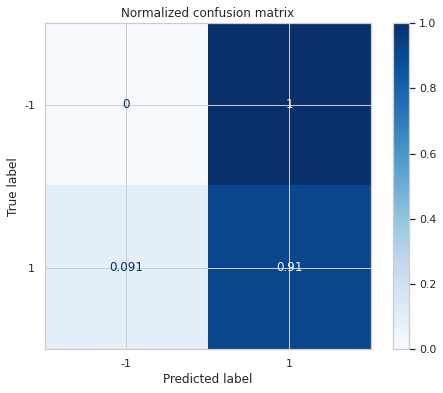

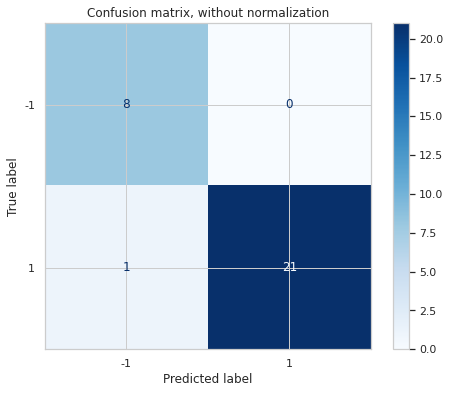

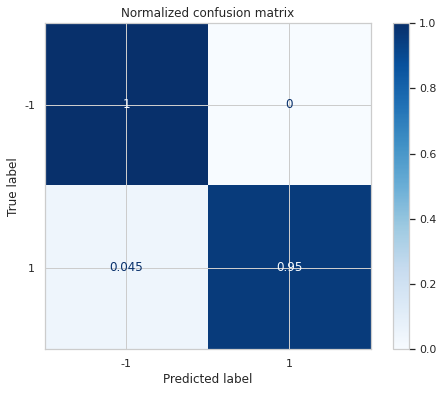

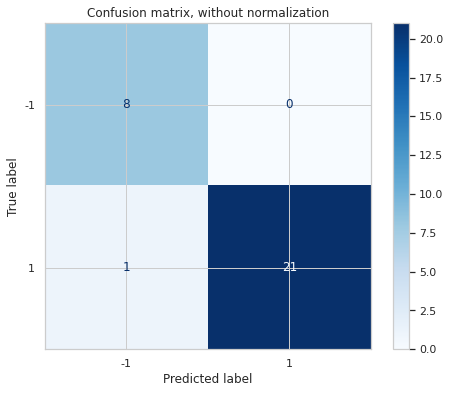

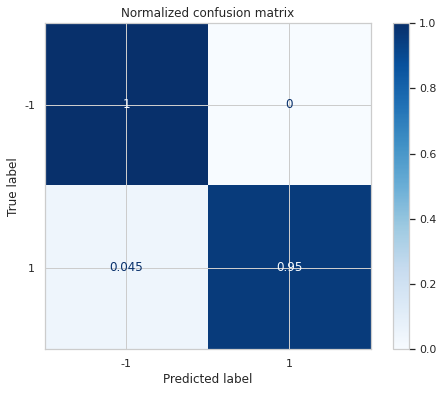

In [31]:
from sklearn.metrics import plot_confusion_matrix

# A Tuple of tuples consisting of the model and their corresponding Test-set and test labels
# in order for me to use the correct Test-set, test label for the corresponding classifier (one uses Gram matrix!)
classifiers = ( (lin, x_test , y_test) , (gau, x_test, y_test), (clflin2.fit(train_gram, train_labels), test_gram, test_labels) )



titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

# loop over all models in classifiers and print their confuison matrix
for classifier, test_set, test_lable in classifiers:
  # code from the link above
  for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, test_set, test_lable,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    # display_labels:  By default, labels will be used if it is defined, otherwise the unique labels of y_true and y_pred will be used (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix)
    # i.e our labels 1 and -1 will be used 
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

I think it barely matters whether you choose between a normalized or a none normalized condfuison matrix. I mean at the end of the day you get the same result. The only difference is, that one shows you the percentage and the other one the real number of missclassified datapoints.

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Use a contour plot to show the classification boundaries of your SVMs. [[link here]](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)

#### BONUS **[ZERO pt]** Learn to search for the best values for `gamma` and `C`. [[link here]](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

#### BONUS **[ZERO pt]** Generate points to run through with a regression algorithm like Linear Regression from our earlier exercises. This time start from a nonlinear equation (e.g. $x^2$), and add noise as usual. Then try your hand with SVR with a (linear or) nonlinear kernel, which is equivalent to running Linear Regression on the Gram matrix (yet another name: Kernel Ridge Regression) [[link here]](https://scikit-learn.org/stable/modules/kernel_ridge.html).

### Final considerations

- I once read a quote that restricting calculus to linear functions is like restricting biology to the study of great apes (help tracking its origin would be welcome). We start from linearity because it's easier to study; the real world is rarely so kind, so learning adaptations such as the kernel trick is simply invaluable.
- Trying (scikit-learn) Naïve Bayes or Linear Discriminant Analysis on the Gram matrices would take you just a minute and be invaluable experience. For example, I wouldn't be surprised if LDA performed better than NB (think: why?). But if we had a very large dataset, the Gram matrix would become too large for LDA to handle (remember it does not scale well on the number of features).
- If you want to learn actually useful skills, do not overlook the bonus questions from now on, I am switching the topic from "curiosity" to "deployed value".